In [1]:
import sys
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_audio(path, sr=16000):
    # mono=True để gộp kênh; sr=16000 để chuẩn hóa so sánh
    y, sr = librosa.load(path, sr=sr, mono=True)
    # scale nhỏ để tránh clip khi plot chồng
    if np.max(np.abs(y)) > 0:
        y = y / np.max(np.abs(y))
    return y, sr

def draw_waveform(f1, f2, f3, out_png="waveforms.png", sr=16000):
    y2, sr2 = load_audio(f2, sr=sr)
    y1, sr1 = load_audio(f1, sr=sr)
    y3, sr3 = load_audio(f3, sr=sr)
    
    print("y1: ", str(y1[1000:1010]))
    print("y2: ", str(y2[1000:1010]))
    print("y3: ", str(y3[1000:1010]))

    t1 = np.arange(len(y1)) / sr1
    t2 = np.arange(len(y2)) / sr2
    t3 = np.arange(len(y3)) / sr3

    print(f"[1] {os.path.basename(f1)} — sr={sr1}, duration={len(y1)/sr1:.3f}s, samples={len(y1)}")
    print(f"[2] {os.path.basename(f2)} — sr={sr2}, duration={len(y2)/sr2:.3f}s, samples={len(y2)}")
    print(f"[3] {os.path.basename(f3)} — sr={sr3}, duration={len(y3)/sr3:.3f}s, samples={len(y3)}")
    
    # Figure 1: plot chung một trục (cùng thời gian)
    plt.figure(figsize=(12, 4))
    plt.plot(t1, y1, linewidth=0.8, label=f"1) {os.path.basename(f1)}")
    plt.plot(t2, y2, linewidth=0.8, alpha=0.8,  label=f"2) {os.path.basename(f2)}")
    plt.plot(t3, y3, linewidth=0.8, alpha=0.8, label=f"3) {os.path.basename(f3)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (normalized)")
    plt.title("Waveforms (same axis)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Figure 2: 2 hàng riêng (dễ quan sát)
    fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=False)
    axes[0].plot(t1, y1, linewidth=0.8)
    axes[0].set_title(f"Waveform: {os.path.basename(f1)}")
    axes[0].set_ylabel("Amplitude")

    axes[1].plot(t2, y2, linewidth=0.8)
    axes[1].set_title(f"Waveform: {os.path.basename(f2)}")
    axes[1].set_xlabel("Time (s)")
    axes[1].set_ylabel("Amplitude")

    axes[2].plot(t3, y3, linewidth=0.8)
    axes[2].set_title(f"Waveform: {os.path.basename(f3)}")
    axes[2].set_xlabel("Time (s)")
    axes[2].set_ylabel("Amplitude")
    
    plt.tight_layout()
    fig.savefig(out_png, dpi=150)
    print(f"Saved figure to: {out_png}")
    plt.show()

y1:  [-3.8872147e-07 -5.8615035e-07 -1.1048027e-06 -4.6388297e-07
 -7.4198078e-07 -2.3646390e-07 -2.3650529e-07 -5.9605770e-07
  2.0066359e-07  3.2743213e-07]
y2:  [ 4.8699911e-07 -8.3611991e-07 -4.1447814e-07  4.9901968e-07
 -1.5091062e-07  1.7743282e-06 -4.5133586e-07 -4.8083189e-07
 -2.5678719e-06 -1.2641340e-06]
y3:  [ 1.8124919e-06 -2.6441219e-06  8.5221490e-07 -6.2008775e-07
  5.9326436e-07 -6.9276223e-07 -2.2804293e-06  1.4247175e-06
 -3.1959275e-06  1.7438672e-06]
[1] audio_01.mp3 — sr=16000, duration=3.144s, samples=50305
[2] audio_02.mp3 — sr=16000, duration=3.096s, samples=49537
[3] audio_03.mp3 — sr=16000, duration=3.336s, samples=53377


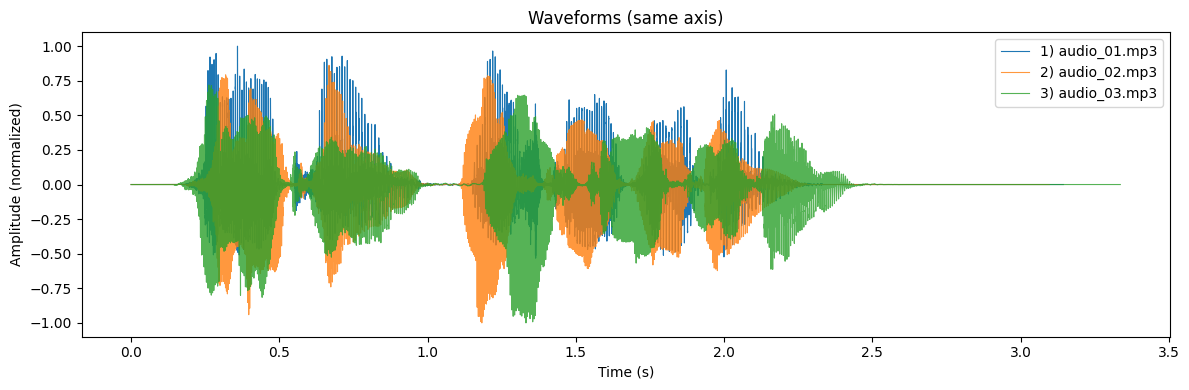

Saved figure to: waveforms.png


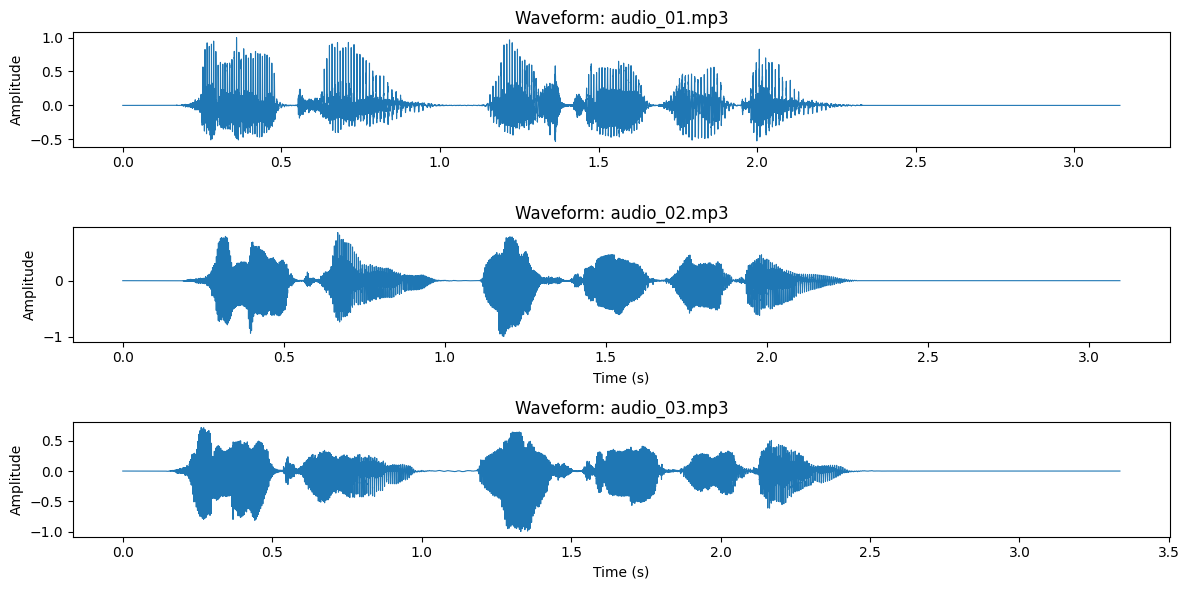

In [3]:
f1 = "./audio_files/audio_01.mp3"
f2 = "./audio_files/audio_02.mp3"
f3 = "./audio_files/audio_03.mp3"

output_png = "waveforms.png"

draw_waveform(f1, f2, f3, output_png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Đọc file audio
audio_path = './audio_02.mp3'  # Thay đổi đường dẫn file của bạn
y, sr = librosa.load(audio_path, sr=None)

# Lấy một đoạn ngắn để hiển thị rõ các điểm
# Ví dụ: lấy 0.1 giây đầu tiên
duration = 0.15  # giây
samples = int(sr * duration)
y_segment = y[:samples]

# Tạo trục thời gian
time = np.linspace(0, duration, samples)

# Vẽ waveform với các điểm rõ ràng
plt.figure(figsize=(15, 6))

# Plot 1: Waveform với đường nối
plt.subplot(2, 1, 1)
plt.plot(time, y_segment, linewidth=0.5, alpha=0.7, color='blue')
plt.scatter(time, y_segment, s=10, color='red', alpha=0.5, zorder=5)
plt.title('Waveform với các điểm sample rõ ràng', fontsize=14)
plt.xlabel('Thời gian (giây)')
plt.ylabel('Biên độ')
plt.grid(True, alpha=0.3)
plt.xlim(0, duration)

# Plot 2: Zoom vào một đoạn nhỏ hơn để thấy rõ hơn
zoom_duration = 0.01  # 10ms
zoom_samples = int(sr * zoom_duration)
y_zoom = y[:zoom_samples]
time_zoom = np.linspace(0, zoom_duration, zoom_samples)

plt.subplot(2, 1, 2)
plt.plot(time_zoom, y_zoom, linewidth=1, marker='o', markersize=4, 
         linestyle='-', color='blue', markerfacecolor='red', 
         markeredgecolor='darkred', markeredgewidth=0.5)
plt.title(f'Zoom vào {zoom_duration*1000}ms đầu - Thấy rõ khoảng cách giữa các sample', fontsize=14)
plt.xlabel('Thời gian (giây)')
plt.ylabel('Biên độ')
plt.grid(True, alpha=0.3)
plt.xlim(0, zoom_duration)

# Thêm thông tin về khoảng cách giữa các sample
sample_distance = 1/sr
plt.text(0.02, 0.95, f'Khoảng cách giữa các sample: {sample_distance*1000:.4f} ms\nSample rate: {sr} Hz', 
         transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# In thông tin
print(f"Sample rate: {sr} Hz")
print(f"Độ dài audio: {len(y)/sr:.2f} giây")
print(f"Tổng số sample: {len(y)}")
print(f"Khoảng cách thời gian giữa các sample: {1/sr*1000:.4f} ms")
print(f"Số sample trong {duration} giây đầu: {samples}")


# ===== PHIÊN BẢN CHỈ SỬ DỤNG CÁC THƯ VIỆN CƠ BẢN =====
# Nếu không có librosa, có thể dùng scipy để đọc file WAV

"""
import scipy.io.wavfile as wavfile
import numpy as np
import matplotlib.pyplot as plt

# Đọc file WAV
sr, y = wavfile.read('your_audio_file.wav')

# Nếu stereo, chuyển sang mono
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Chuẩn hóa về [-1, 1]
y = y / np.max(np.abs(y))

# Tiếp tục với code vẽ như trên...
"""

C:\Users\Tyan\AppData\Local\Temp\ipykernel_18688\2337577703.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
d:\Tyan\Quickom\wav2vec\myenv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: './audio_02.mp3'